# TP4

# Analyse de la thématique des travaux liés aux transports en commun à Bruxelles

### Imports

In [1]:
# Tous les imports liés à notre thématique 
# Extraction de keywords
import os
import yake
# WordCloud et stopwords
from collections import Counter
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from PIL import Image
import PIL.Image
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
#Graphes et tableaux
import sys
import matplotlib.pyplot as plt
import numpy as np
from os import path, getcwd
import re
import matplotlib as mpl
from tabulate import tabulate
from numpy import zeros,array
import pandas as pd
# Sentiment analysis
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Extraction de keywords et nettoyage des fichiers

### Extraire les mots clés d'un document avec Yake 

In [2]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général", "bruxelles", "conseil supérieur", "belgique",
               "administration communale", "conseil provincial", "administration générale", "administration supérieure"])
ignored

{'administration communale',
 'administration générale',
 'administration supérieure',
 'belgique',
 'bruxelles',
 'conseil communal',
 'conseil général',
 'conseil provincial',
 'conseil supérieur'}

In [3]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
# Lister les Fichiers
data_path = "../data/tp4/transports/"

In [5]:
# Toute les années 
all_years = [str(year) for year in range(1869, 1976)]

In [6]:
# Enlever les fichiers qui ne commencent pas par Bxl_
files = sorted(os.listdir(data_path))
bxl_files = [f for f in files if f.startswith('Bxl_')]
len(bxl_files)

579

In [7]:
# Choisir un fichier
this_file = bxl_files[0]
this_file

'Bxl_1869_Tome_I1_Part_1.txt'

In [8]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

"VILLE DE\n\nBRUXELLES.\n\nBULLETIN\n\nA N N É E\n\nPREMIER\n\nCOMMUNAL.\n\n1869.\n\nSEMESTRE.\n\nB R U X E L L E S ,\nIMPRIMERIE\n\nBOLS-WITTOUCK.\n\n\x0c\x0cVILLE\n\nDE B R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL.\n\nANNÉE 1869.\n\nNUMÉRO\n\nLUNDI 11\n\ni.\n\nJANVIER.\n\nPrix du Pain.\n\nLe Bourgmestre de la ville de Bruxelles\nInforme le public qu'il résulte des rapports des officiers de police\nque le pain de ménage se vend à :\n52 cent, par kil. :\n54 cent, par kil. chez :\nAu dépôt, rue d'Anderlecht, 5o.\nNerinçkx, rue De Middeleer, 2.\n55 cen"

In [9]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [10]:
keywords

[('Collège', 0.00037234140696300354),
 ('Bourgmestre', 0.0005995967598952517),
 ('Conseil', 0.0008064309843552984),
 ('VILLE', 0.0008602075577881999),
 ('rue', 0.000897092562072066),
 ('théâtre', 0.0012494949064574528),
 ('BRUXELLES', 0.001361124698932316),
 ('Conseil communal', 0.0014902597330057883),
 ('subside', 0.001648726081686134),
 ('concessionnaire', 0.001753501387570602),
 ('section', 0.0018204136802898554),
 ('francs', 0.0018717702073472449),
 ('VILLE DE BRUXELLES', 0.0020814852660669576),
 ('Art', 0.0027802247231586467),
 ("qu'il", 0.0028085777505349016),
 ('section des finances', 0.0029214830773279642),
 ('faire', 0.0029762169744296527),
 ('rapport', 0.003311803421354501),
 ('cahier des charges', 0.0034963042407007245),
 ('Monnaie', 0.0037161919857026954),
 ('Collège pourra', 0.003963496251577315),
 ('conseil général', 0.004080925915908513),
 ('Messieurs', 0.004141979515135482),
 ("d'un", 0.00414283409089288),
 ('Collège des Bourgmestre', 0.004976886146894458),
 ('Collège p

In [11]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

['Collège pourra',
 'rue Haute',
 'rue Granvelle',
 'travaux publics',
 "d'un théâtre"]

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [12]:
# Stopwords
sw = stopwords.words("french", "dutch")
sw += ["les", "plus", "cette", "faire", "deux", "bien", "après", "ainsi", "cet",
       "celle", "entre", "toutes", "pendant", "dire", "non", "faut", "trois", 
       "aussi", "dit", "contre", "autres", "van", "het", "autre", "jusqu", "ville", 
       "alors", "juste", "sujet", "au", "la", "sur", "aucuns", "le", "ta", "tandis", 
       "leur", "tellement", "avant", "là", "tels", "avec", "ma", "tes","avoir", 
       "maintenant", "ton", "bon", "car", "mais", "tous", "cela", "mes", "tout", "ce", 
       "mien", "trop", "moins", "très", "mon", "tu", "mot", "ces", "chaque", "voient", 
       "même", "vont", "ceux", "ni", "votre", "ci", "nommés", "vous", "comment", "comme", 
       "notre", "vu", "dans",  "nous", "ça", "des", "ou", "étaient", "dedans", "du", "où", 
       "état", "par",  "étions", "dehors", "parce", "été", "depuis", "pas", "être", "devrait", 
       "peut",  "doit", "peu", "donc", "plupart", "dos", "pour", "début", "pourquoi", "elle",  
       "quand", "elles", "que", "on", "quel", "encore", "quelle", "essai", "quelles",  "et", 
       "quels", "est", "qui", "eu", "sa", "fait", "son", "faites", "ses", "fois",  "seulement", 
       "font", "si", "hors", "sien", "ici", "sans", "il", "sont", "ils",  "sous", "je", "soyez"]
      
sw = set(sw)

In [13]:
# Choisir tous les fichiers du document
all_years = [str(year) for year in range(1869, 1976)]

In [14]:
# Lister les fichiers du document
data_path = '../data'
txt_path = "../data/tp4/transports"
txts = sorted(os.listdir(txt_path))
len(txts)

579

In [15]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [16]:
# Compter le nombre de fichiers dans la liste
len(content_list)

579

In [17]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE DE\n\nBRUXELLES.\n\nBULLETIN\n\nA N N É E\n\nPREMIER\n\nCOMMUNAL.\n\n1869.\n\nSEMESTRE.\n\nB R U X E L L E S ,\nIMPRIMERIE\n\nBOLS-WITTOUCK.\n\n\x0c\x0cVILLE\n\nDE B R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL.\n\nANNÉE 1869.\n\nNUMÉ'

In [18]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tp4/tmp'
title = 'all_years'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{title}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [19]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{title}.txt'), 'r') as f:
    before = f.read()

before[:500]

"VILLE DE\n\nBRUXELLES.\n\nBULLETIN\n\nA N N É E\n\nPREMIER\n\nCOMMUNAL.\n\n1869.\n\nSEMESTRE.\n\nB R U X E L L E S ,\nIMPRIMERIE\n\nBOLS-WITTOUCK.\n\n\x0c\x0cVILLE\n\nDE B R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL.\n\nANNÉE 1869.\n\nNUMÉRO\n\nLUNDI 11\n\ni.\n\nJANVIER.\n\nPrix du Pain.\n\nLe Bourgmestre de la ville de Bruxelles\nInforme le public qu'il résulte des rapports des officiers de police\nque le pain de ménage se vend à :\n52 cent, par kil. :\n54 cent, par kil. chez :\nAu dépôt, rue d'Anderlecht, 5o.\nNerinçkx, rue De Middeleer, 2.\n55 cen"

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [20]:
def clean_text(title, folder=None):
    if folder is None:
        input_path = f"{title}.txt"
        output_path = f"{title}_clean.txt"
    else:
        input_path = f"{folder}/{title}.txt"
        output_path = f"{folder}/{title}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [21]:
# Nettoyer
clean_text(title, folder=temp_path)

'Output has been written in ../data/tp4/tmp/all_years_clean.txt!'

In [22]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{title}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bruxelles bulletin premier communal semestre imprimerie bols wittouck bulletin communal année numéro lundi janvier prix pain bourgmestre bruxelles informe public résulte rapports officiers police pain ménage vend cent kil cent kil chez dépôt rue anderlecht nerinçkx rue middeleer cent kil chez degroof rue haute vanrotterdam rue haute sierens rue prévoyance dépôt rue teinturiers vannieuwenhoven rue haute boulangerie écon rue tanneurs herpels rue granvelle hoogveldts rue pierres taymans rue granvel'

## Afficher les termes les plus fréquents dans un WordCloud

In [23]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('francs', 37710), ('rue', 36001), ('conseil', 27070), ('bruxelles', 24437), ('collège', 21623), ('bourgmestre', 21039), ('travaux', 19859), ('service', 19625), ('publique', 18724), ('communal', 18486)]


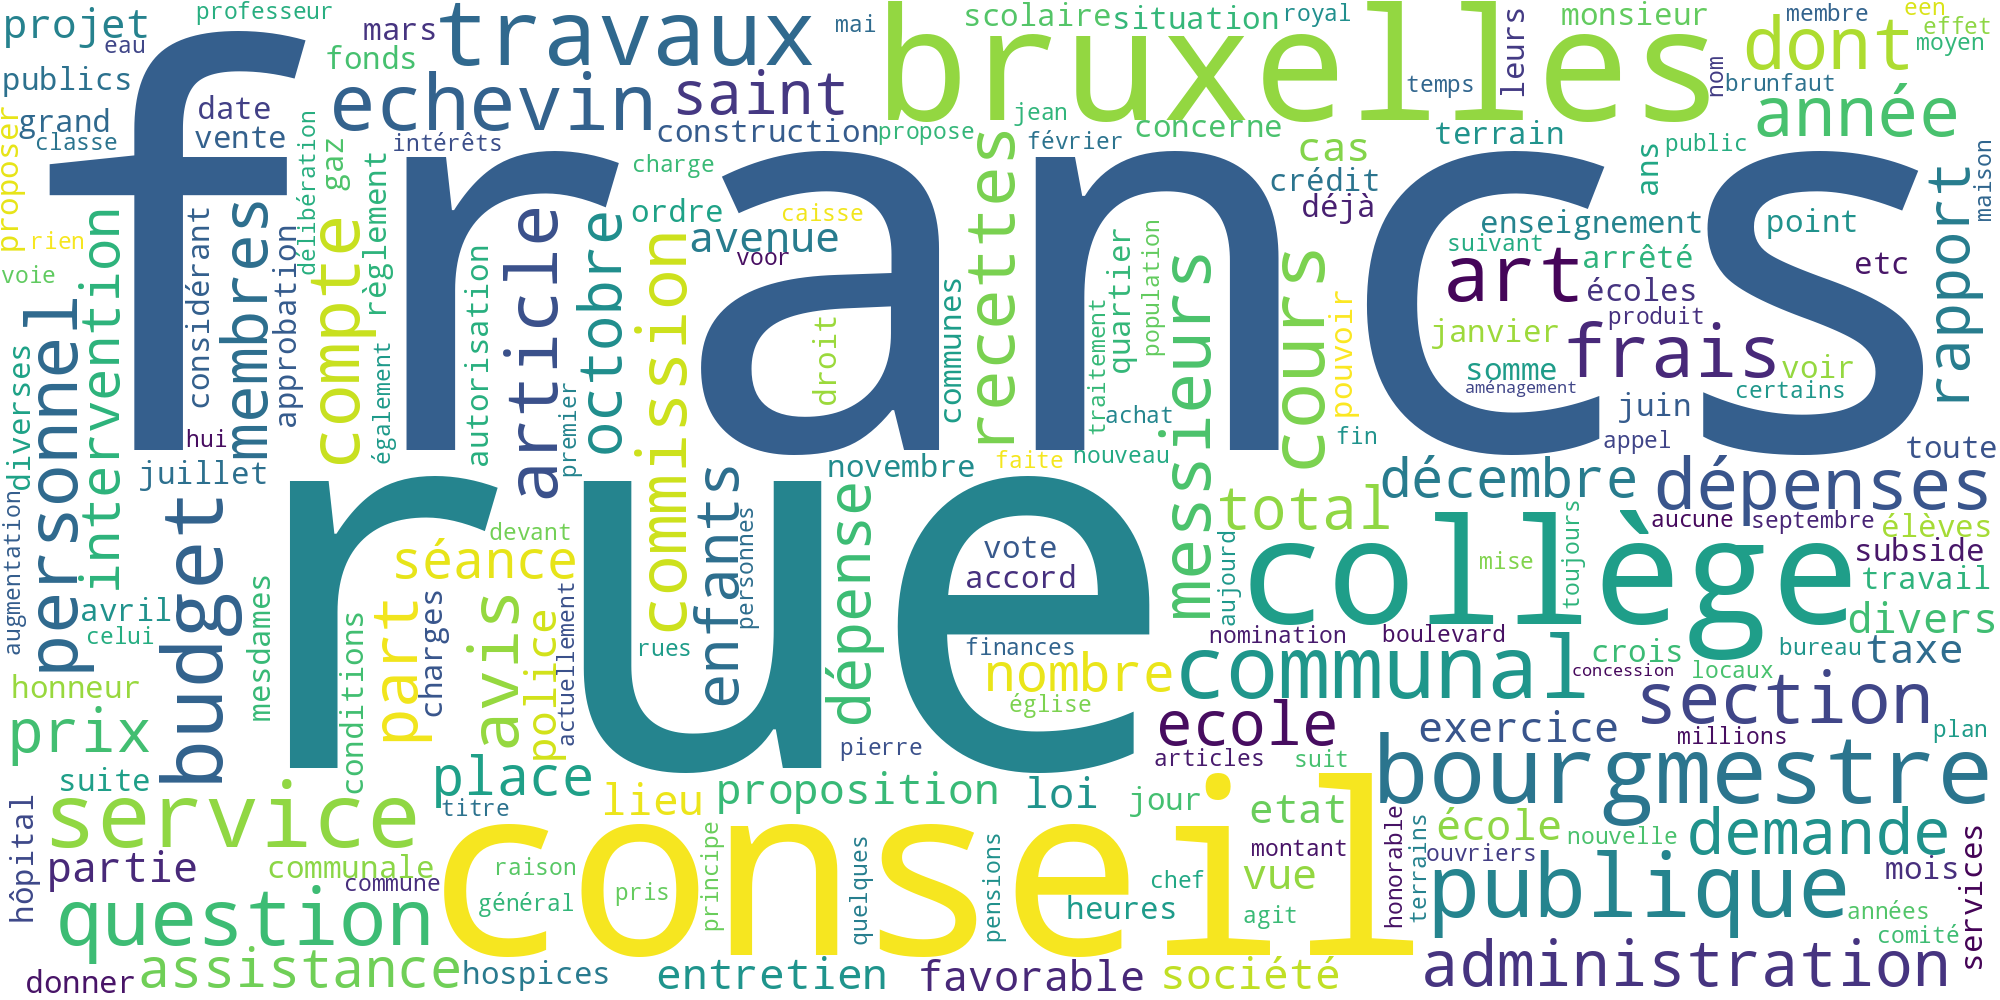

In [24]:
wordcloud = WordCloud(stopwords = sw,
                      collocations=True).generate(text)
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{title}.png"))
Image(filename=os.path.join(temp_path, f"{title}.png"))

## Comparaison de la fréquence des mots liés aux transports en commun

In [25]:
# Le nombre d'occurrences des transports en commun dans le fichier comportant uniquement les années liées aux travaux
transportdoc = []
def check_if_exists(x, ls, r):
    if x in ls:
        transportdoc.append(r)
data_path = '../data'
txt_path = "../data/tp4/transports"
files = os.listdir(txt_path)

for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('transport', jstring, q)
print("Le mot 'transport' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('transports', jstring, q)
print("Le mot 'transports' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('métro', jstring, q)
print("Le mot 'métro' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('métros', jstring, q)
print("Le mot 'métros' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('tramway', jstring, q)
print("Le mot 'tramway' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('tramways', jstring, q)
print("Le mot 'tramways' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('bus', jstring, q)
print("Le mot 'bus' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('autobus', jstring, q)
print("Le mot 'autobus' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 

for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('train', jstring, q)    
print("Le mot 'train' est présent dans "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('trains', jstring, q)    
print("Le mot 'trains' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('STIB', jstring, q)    
print("Le mot 'STIB' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('De Lijn', jstring, q)    
print("Le mot 'De Lijn' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents")
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('TEC', jstring, q)    
print("Le mot 'TEC' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents")
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('SNCV', jstring, q)    
print("Le mot 'SNCV' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 

for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('SNCB', jstring, q)    
print("Le mot 'SNCB' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 

Le mot 'transport' est présent 426 fois dans 579 documents
Le mot 'transports' est présent 664 fois dans 579 documents
Le mot 'métro' est présent 664 fois dans 579 documents
Le mot 'métros' est présent 664 fois dans 579 documents
Le mot 'tramway' est présent 920 fois dans 579 documents
Le mot 'tramways' est présent 1155 fois dans 579 documents
Le mot 'bus' est présent 1648 fois dans 579 documents
Le mot 'autobus' est présent 1800 fois dans 579 documents
Le mot 'train' est présent dans 2064 fois dans 579 documents
Le mot 'trains' est présent 2101 fois dans 579 documents
Le mot 'STIB' est présent 2101 fois dans 579 documents
Le mot 'De Lijn' est présent 2101 fois dans 579 documents
Le mot 'TEC' est présent 2181 fois dans 579 documents
Le mot 'SNCV' est présent 2181 fois dans 579 documents
Le mot 'SNCB' est présent 2181 fois dans 579 documents


In [26]:
# Tableau simplifiant l'output ci-dessus
table = [['Mots', 'Occurrences'], ['Transports', 664], ['Métros', 664], ['Tramways', 1155], ['Autobus', 1800], 
         ['Trains', 2101], ['STIB', 2101], ['De Lijn', 2101], ['TEC', 2181], ['SNCV', 2181], ['SNCB', 2180]]
print(tabulate(table, tablefmt='fancy_grid'))

╒════════════╤═════════════╕
│ Mots       │ Occurrences │
├────────────┼─────────────┤
│ Transports │ 664         │
├────────────┼─────────────┤
│ Métros     │ 664         │
├────────────┼─────────────┤
│ Tramways   │ 1155        │
├────────────┼─────────────┤
│ Autobus    │ 1800        │
├────────────┼─────────────┤
│ Trains     │ 2101        │
├────────────┼─────────────┤
│ STIB       │ 2101        │
├────────────┼─────────────┤
│ De Lijn    │ 2101        │
├────────────┼─────────────┤
│ TEC        │ 2181        │
├────────────┼─────────────┤
│ SNCV       │ 2181        │
├────────────┼─────────────┤
│ SNCB       │ 2180        │
╘════════════╧═════════════╛


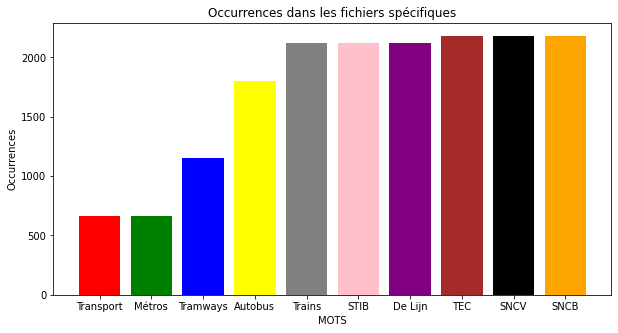

In [28]:
# Graphe reprenant l'output

# taille du graphique
plt.figure(figsize = (10,5))

# titre du graphique
plt.title('Occurrences dans les fichiers spécifiques')

# nombre de barres dans l'axe x
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# hauteurs de l'axe y
height = [664, 664, 1155, 1800, 2120, 2120, 2120, 2181, 2181, 2180]

# noms des barres de l'axe x
tick_label = ['Transport', 'Métros', 'Tramways', 'Autobus', 'Trains', 'STIB', 'De Lijn', 'TEC', 'SNCV', 'SNCB']

# couleurs des barres
plt.bar(left, height, tick_label = tick_label,
width = 0.8, color = ['red', 'green', 'blue', 'yellow', 'grey', 'pink', 'purple', 'brown', 'black', 'orange'])

# non de l'axe x
plt.xlabel('MOTS')
# nom de l'axe y
plt.ylabel('Occurrences')

# générer le graphe
plt.show()

## Sentiment analysis avec Textblob-FR

In [29]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [30]:
get_sentiment("Les autobus ne stationnent pas.")

This text is neutral and perfectly objective.


In [31]:
get_sentiment("des autobus restent dans les cartons au lieu d'être soumis au Conseil communal")

This text is neutral and perfectly objective.


In [32]:
get_sentiment("les autobus ont besoin d'une surveillance sérieuse car ils soulèvent des plaintes nombreuses et donnent lieu à des inconvénients")

This text is 22% positive and 0.375% subjective.


In [33]:
get_sentiment("Il serait donc très-facile pour tous nos concitoyens-d'arriver en tramway jusqu'au rond-point.")

This text is 22% positive and 0.1% subjective.


In [34]:
get_sentiment("Les transports nous aident à transporter les corps des enfants.")

This text is neutral and perfectly objective.


In [35]:
get_sentiment("Les métros ne cessent de rouler.")

This text is neutral and perfectly objective.


In [36]:
get_sentiment("En divisant la SNCV nous pourrions ne plus rencontrer de problèmes.")

This text is 8% negative and 0.1% subjective.
